# Задание 1

### Найти данные для классификации. Данные в группе повторяться не должны. Предобработать данные, если это необходимо.

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# kirillkim71
# 39d1b74c7680ac8e32302e0efa5ae562

In [ ]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/yasserh/titanic-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kirillkim71
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset


100%|██████████| 22.0k/22.0k [00:00<00:00, 97.9MB/s]

In [ ]:
data = pd.read_csv('/content/titanic-dataset/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_clean = data.copy()

In [ ]:
df_clean = df_clean.drop(columns = ['Cabin', 'Ticket', 'PassengerId', 'Name'])

In [ ]:
df_clean['Age'].fillna(df_clean['Age'].mean(),inplace=True)

/tmp/ipython-input-827675275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(df_clean['Age'].mean(),inplace=True)


In [ ]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_clean.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
df_clean.dropna(subset='Embarked',inplace=True)

In [ ]:
le = LabelEncoder()

df_clean['Sex'] = le.fit_transform(df_clean['Sex'])
df_clean['Embarked'] = le.fit_transform(df_clean['Embarked'])
df_clean=df_clean.astype(int)

df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,2
1,1,1,0,38,1,0,71,0
2,1,3,0,26,0,0,7,2
3,1,1,0,35,1,0,53,2
4,0,3,1,35,0,0,8,2


# Задание 2

### Изобразить гистограмму, которая показывает баланс классов. Сделать выводы.

In [ ]:
# Анализ баланса классов
class_counts = df_clean['Survived'].value_counts()
print("Распределение классов:")
print(f"Выжившие (1): {class_counts[1]} ({class_counts[1]/len(df_clean)*100:.1f}%)")
print(f"Погибшие (0): {class_counts[0]} ({class_counts[0]/len(df_clean)*100:.1f}%)")

Распределение классов:
Выжившие (1): 340 (38.2%)
Погибшие (0): 549 (61.8%)


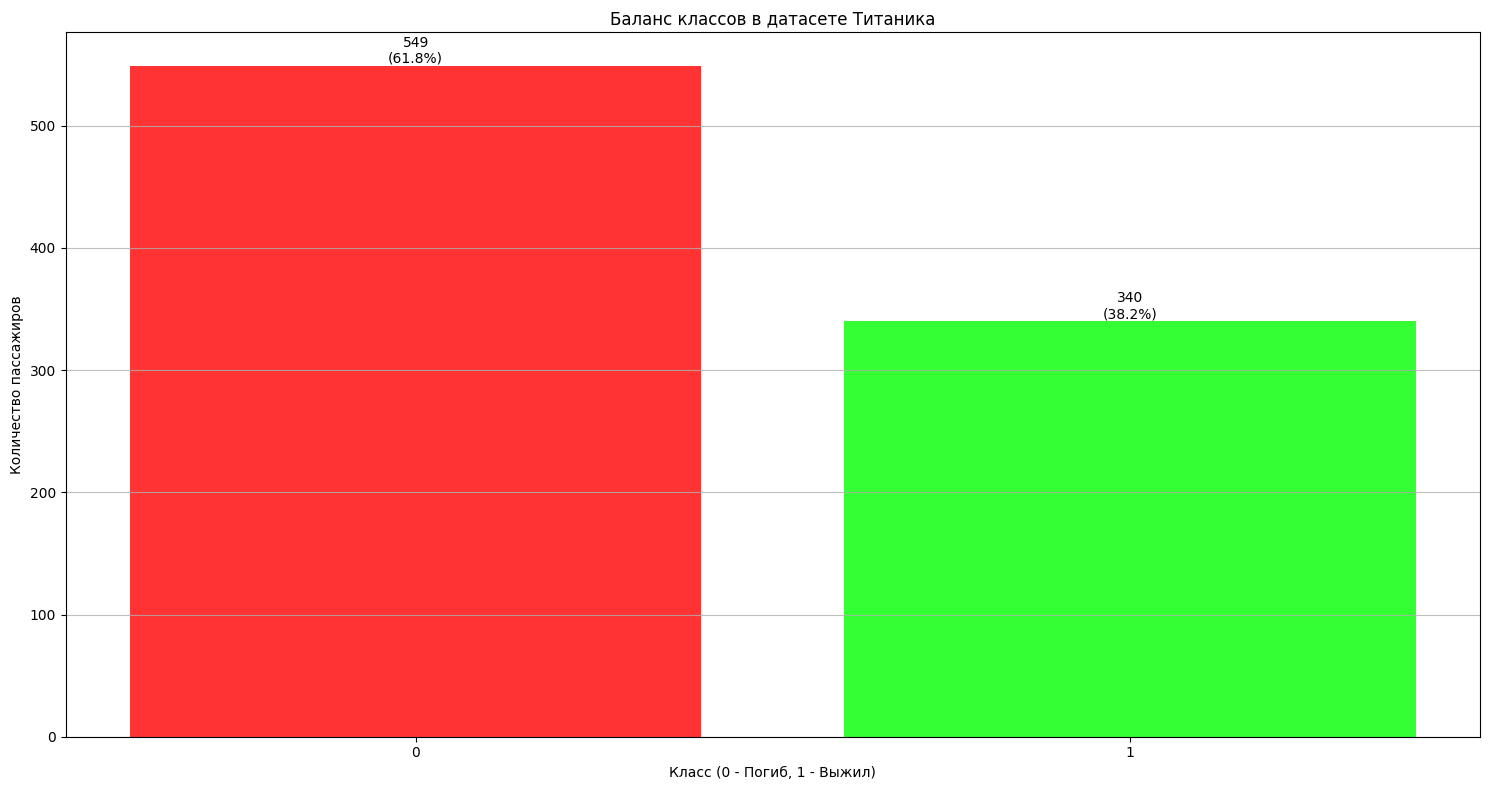

In [ ]:
plt.figure(figsize=(15, 8))
bars = plt.bar(class_counts.index, class_counts.values, color=['red', 'lime'], alpha=0.8)
plt.xlabel('Класс (0 - Погиб, 1 - Выжил)')
plt.ylabel('Количество пассажиров')
plt.title('Баланс классов в датасете Титаника')
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.8)

# Добавление подписей значений на столбцах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({height/len(df_clean)*100:.1f}%)',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Задание 3

### Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества.

In [ ]:
X = df_clean.drop("Survived",axis=1)
y = df_clean['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Задание 4

### Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей (использовать confusion_matrix из sklearn.metrics)

#### Логистическая регрессия

In [ ]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=3000, random_state=271)
LogReg.fit(X_train, y_train)
y_pred_logreg = LogReg.predict(X_test)

##### Матрица ошибок

Text(0.5, 1.0, 'Матрица ошибок')

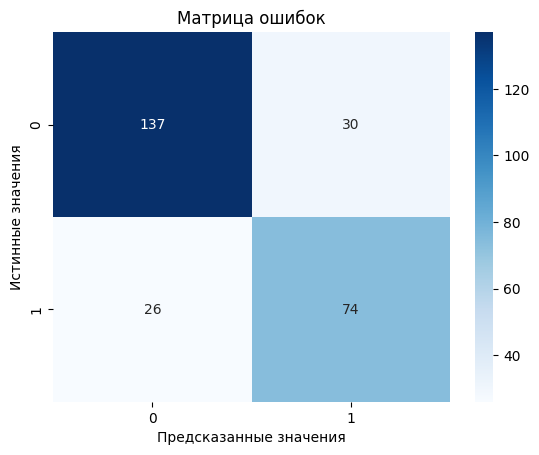

In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.title("Матрица ошибок")

#### SVM

In [ ]:
modelSVM = SVC(kernel= 'linear')
modelSVM.fit(X_train, y_train)
y_pred_svm = modelSVM.predict(X_test)

##### Матрица ошибок

Text(0.5, 1.0, 'Матрица ошибок')

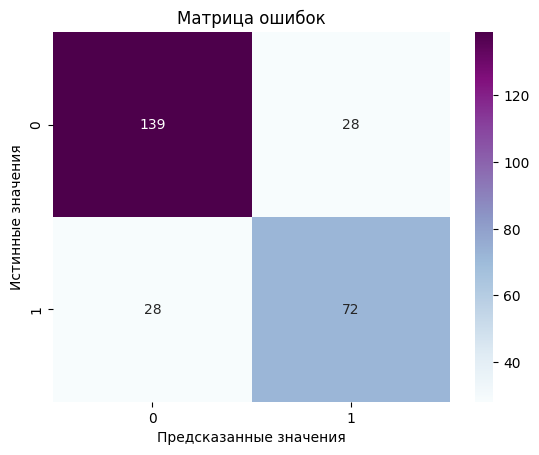

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.title("Матрица ошибок")

#### KNN

In [ ]:
modelKNN = KNeighborsClassifier()

n_n = np.arange(3, 10)
params = {"n_neighbors": n_n}
grid = GridSearchCV(estimator=modelKNN, param_grid=params, cv=6)

grid.fit(X_train, y_train)
y_pred_knn = grid.predict(X_test)

##### Матрица ошибок

Text(0.5, 1.0, 'Матрица ошибок')

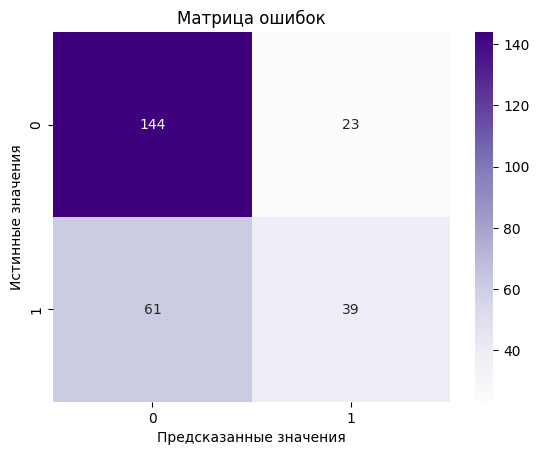

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.title("Матрица ошибок")

# Задание 5

### Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру (можно использовать classification_report из sklearn.metrics). Сделать выводы.

#### Для логистической регрессии

In [ ]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print('Accuracy:', round(accuracy_logreg, 2))
print('Precision:', round(precision_logreg, 2))
print('Recall:', round(recall_logreg, 2))
print('F1-score:', round(f1_logreg, 2))

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1-score: 0.79


In [ ]:
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
report_logreg = pd.DataFrame(report_logreg).transpose()
report_logreg

,precision,recall,f1-score,support
0,0.840491,0.820359,0.830303,167.000000
1,0.711538,0.740000,0.725490,100.000000
accuracy,0.790262,0.790262,0.790262,0.790262
macro avg,0.776015,0.780180,0.777897,267.000000
weighted avg,0.792194,0.790262,0.791047,267.000000


#### Для SVM

Accuracy = Сумма верно предсказанных / Количество всех объектов
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
F-мера содержит в себе и полноту и точность,
если    B > 1 - Recall
        B < 1 - Precision

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print('Accuracy:', round(accuracy_svm, 2))
print('Precision:', round(precision_svm, 2))
print('Recall:', round(recall_svm, 2))
print('F1-score:', round(f1_svm, 2))

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1-score: 0.79


In [ ]:
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm = pd.DataFrame(report_svm).transpose()
report_svm

,precision,recall,f1-score,support
0,0.832335,0.832335,0.832335,167.000000
1,0.720000,0.720000,0.720000,100.000000
accuracy,0.790262,0.790262,0.790262,0.790262
macro avg,0.776168,0.776168,0.776168,267.000000
weighted avg,0.790262,0.790262,0.790262,267.000000


#### Для KNN

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn= recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print('Accuracy:', round(accuracy_knn, 2))
print('Precision:', round(precision_knn, 2))
print('Recall:', round(recall_knn, 2))
print('F1-score:', round(f1_knn, 2))

Accuracy: 0.69
Precision: 0.67
Recall: 0.69
F1-score: 0.66


In [ ]:
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
report_knn

,precision,recall,f1-score,support
0,0.702439,0.862275,0.774194,167.000000
1,0.629032,0.390000,0.481481,100.000000
accuracy,0.685393,0.685393,0.685393,0.685393
macro avg,0.665736,0.626138,0.627838,267.000000
weighted avg,0.674946,0.685393,0.664564,267.000000
